In [1]:
import cv2
import mediapipe as mp
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose
mp_holistic = mp.solutions.holistic

In [2]:
import math
import numpy as np
from PIL import Image

In [3]:
DESIRED_HEIGHT = 800
DESIRED_WIDTH = 800

In [4]:
POSELANDMARKS = ['PoseLandmark.NOSE', 'PoseLandmark.LEFT_EYE_INNER', 'PoseLandmark.LEFT_EYE', 'PoseLandmark.LEFT_EYE_OUTER', 
'PoseLandmark.RIGHT_EYE_INNER', 'PoseLandmark.RIGHT_EYE', 'PoseLandmark.RIGHT_EYE_OUTER', 'PoseLandmark.LEFT_EAR','PoseLandmark.RIGHT_EAR',
'PoseLandmark.MOUTH_LEFT', 'PoseLandmark.MOUTH_RIGHT','PoseLandmark.LEFT_SHOULDER','PoseLandmark.RIGHT_SHOULDER','PoseLandmark.LEFT_ELBOW',
'PoseLandmark.RIGHT_ELBOW','PoseLandmark.LEFT_WRIST','PoseLandmark.RIGHT_WRIST','PoseLandmark.LEFT_PINKY','PoseLandmark.RIGHT_PINKY',
'PoseLandmark.LEFT_INDEX','PoseLandmark.RIGHT_INDEX','PoseLandmark.LEFT_THUMB','PoseLandmark.RIGHT_THUMB','PoseLandmark.LEFT_HIP',
'PoseLandmark.RIGHT_HIP','PoseLandmark.LEFT_KNEE','PoseLandmark.RIGHT_KNEE','PoseLandmark.LEFT_ANKLE','PoseLandmark.RIGHT_ANKLE',
'PoseLandmark.LEFT_HEEL','PoseLandmark.RIGHT_HEEL','PoseLandmark.LEFT_FOOT_INDEX','PoseLandmark.RIGHT_FOOT_INDEX']

TARGETLANDMARKS = ['PoseLandmark.NOSE', 'PoseLandmark.LEFT_EYE','PoseLandmark.RIGHT_EYE','PoseLandmark.LEFT_EAR','PoseLandmark.RIGHT_EAR',
                  'PoseLandmark.LEFT_SHOULDER','PoseLandmark.RIGHT_SHOULDER','PoseLandmark.LEFT_ELBOW','PoseLandmark.RIGHT_ELBOW',
                  'PoseLandmark.LEFT_WRIST','PoseLandmark.RIGHT_WRIST','PoseLandmark.LEFT_HIP','PoseLandmark.RIGHT_HIP',
                  'PoseLandmark.LEFT_KNEE','PoseLandmark.RIGHT_KNEE','PoseLandmark.LEFT_ANKLE','PoseLandmark.RIGHT_ANKLE',]
print(len(POSELANDMARKS))
print(len(TARGETLANDMARKS))

33
17


In [5]:
def resize_and_show(image):
  h, w = image.shape[:2]
  if h < w:
    img = cv2.resize(image, (DESIRED_WIDTH, math.floor(h/(w/DESIRED_WIDTH))))
  else:
    img = cv2.resize(image, (math.floor(w/(h/DESIRED_HEIGHT)), DESIRED_HEIGHT))
  #cv2.imshow("image",img)
  cv2.waitKey(0)
  cv2.destroyAllWindows()

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


Nose coordinates: (380.55633544921875, 151.90667152404785)


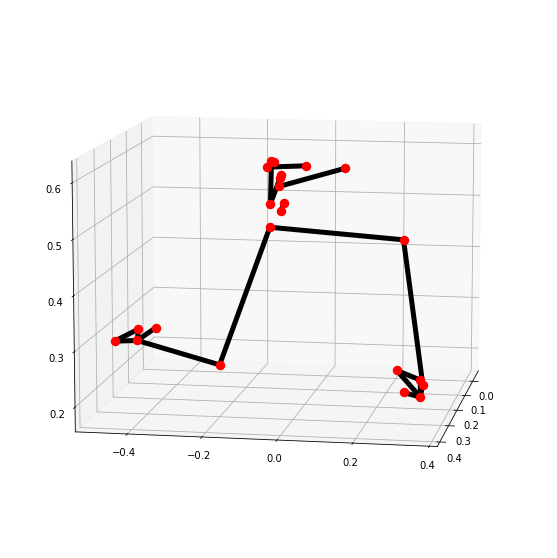

In [6]:
# For static images:
IMAGE_FILES = ['hyunmin.jpg']
with mp_pose.Pose(
    static_image_mode=True,
    model_complexity=2,
    min_detection_confidence=0.5) as pose:
  for idx, file in enumerate(IMAGE_FILES):
    image = cv2.imread(file)
    image_height, image_width, _ = image.shape
    # Convert the BGR image to RGB before processing.
    results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        
    if not results.pose_landmarks:
      continue
    
    print(
        f'Nose coordinates: ('
        f'{results.pose_landmarks.landmark[mp_holistic.PoseLandmark.NOSE].x * image_width}, '
        f'{results.pose_landmarks.landmark[mp_holistic.PoseLandmark.NOSE].y * image_height})'
    )
    # Draw pose landmarks on the image.
    annotated_image = image.copy()
    #print(results.pose_landmarks)
    idx = 0;
    for i in results.pose_landmarks.landmark:
        #print('part : ' + POSELANDMARKS[idx])
        #print(i)
        idx = idx +1
    mp_drawing.draw_landmarks(
        annotated_image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)
    cv2.imwrite('/tmp/annotated_image' + str(idx) + '.png', annotated_image)
    
    resize_and_show(annotated_image)
    
    
    # Plot pose world landmarks.
    mp_drawing.plot_landmarks(
        results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)

In [7]:
# For webcam input:
cap = cv2.VideoCapture(0)
with mp_pose.Pose(
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5) as pose:
  while cap.isOpened():
    success, image = cap.read()
    if not success:
      print("Ignoring empty camera frame.")
      # If loading a video, use 'break' instead of 'continue'.
      continue

    # Flip the image horizontally for a later selfie-view display, and convert
    # the BGR image to RGB.
    image = cv2.cvtColor(cv2.flip(image, 1), cv2.COLOR_BGR2RGB)
    # To improve performance, optionally mark the image as not writeable to
    # pass by reference.
    image.flags.writeable = False
    results = pose.process(image)
    
    # Draw the pose annotation on the image.
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    print(results.pose_landmarks)
    
    mp_drawing.draw_landmarks(
        image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)
    cv2.imshow('MediaPipe Pose', image)
    if cv2.waitKey(5) & 0xFF == 27:
      break
cap.release()
cv2.destroyAllWindows()

None
None
None
landmark {
  x: 0.3283625543117523
  y: 0.9751599431037903
  z: -0.030120253562927246
  visibility: 0.9568268060684204
}
landmark {
  x: 0.3262315094470978
  y: 0.9712324738502502
  z: -0.02692318893969059
  visibility: 0.9622225165367126
}
landmark {
  x: 0.3263521194458008
  y: 0.9714242815971375
  z: -0.026871349662542343
  visibility: 0.9428567886352539
}
landmark {
  x: 0.32639482617378235
  y: 0.9715409874916077
  z: -0.0267538670450449
  visibility: 0.9550051093101501
}
landmark {
  x: 0.3258694112300873
  y: 0.9747828841209412
  z: -0.03748394921422005
  visibility: 0.9703566431999207
}
landmark {
  x: 0.32581067085266113
  y: 0.9748107194900513
  z: -0.03747747465968132
  visibility: 0.9583200812339783
}
landmark {
  x: 0.325688898563385
  y: 0.9748781323432922
  z: -0.037441056221723557
  visibility: 0.9683485627174377
}
landmark {
  x: 0.32615986466407776
  y: 0.9769695997238159
  z: -0.0074552977457642555
  visibility: 0.9427181482315063
}
landmark {
  x: 0.3

landmark {
  x: 0.3364178538322449
  y: 0.9663439989089966
  z: -0.06565818935632706
  visibility: 0.9647756814956665
}
landmark {
  x: 0.33578044176101685
  y: 0.9613612294197083
  z: -0.06789432466030121
  visibility: 0.9696113467216492
}
landmark {
  x: 0.33602070808410645
  y: 0.9614912271499634
  z: -0.0678410604596138
  visibility: 0.9533297419548035
}
landmark {
  x: 0.33628347516059875
  y: 0.961645781993866
  z: -0.067719005048275
  visibility: 0.9639787673950195
}
landmark {
  x: 0.3353888988494873
  y: 0.9613383412361145
  z: -0.06441605091094971
  visibility: 0.9753665924072266
}
landmark {
  x: 0.33526554703712463
  y: 0.9615439772605896
  z: -0.0643983855843544
  visibility: 0.9643746018409729
}
landmark {
  x: 0.3351978659629822
  y: 0.9617720246315002
  z: -0.06435108929872513
  visibility: 0.9738361835479736
}
landmark {
  x: 0.3393433690071106
  y: 0.9667510390281677
  z: -0.06366012990474701
  visibility: 0.9505838751792908
}
landmark {
  x: 0.3368056118488312
  y: 0

landmark {
  x: 0.33497104048728943
  y: 0.9255733489990234
  z: -0.08472965657711029
  visibility: 0.97744220495224
}
landmark {
  x: 0.3358474373817444
  y: 0.9218239188194275
  z: -0.0746738463640213
  visibility: 0.9795809984207153
}
landmark {
  x: 0.33601951599121094
  y: 0.9219915270805359
  z: -0.07467688620090485
  visibility: 0.9715782999992371
}
landmark {
  x: 0.3376983106136322
  y: 0.9220106601715088
  z: -0.07438284903764725
  visibility: 0.9772496223449707
}
landmark {
  x: 0.33347463607788086
  y: 0.921858012676239
  z: -0.07099464535713196
  visibility: 0.9811696410179138
}
landmark {
  x: 0.333570271730423
  y: 0.9224545955657959
  z: -0.07106012850999832
  visibility: 0.9752851724624634
}
landmark {
  x: 0.33014780282974243
  y: 0.9233254194259644
  z: -0.07118445634841919
  visibility: 0.9787118434906006
}
landmark {
  x: 0.340727835893631
  y: 0.9256848692893982
  z: -0.04398521035909653
  visibility: 0.9702752232551575
}
landmark {
  x: 0.3301660120487213
  y: 0.

landmark {
  x: 0.3338601291179657
  y: 0.9093955755233765
  z: -0.1550035923719406
  visibility: 0.9838151931762695
}
landmark {
  x: 0.336805522441864
  y: 0.9016827344894409
  z: -0.15581490099430084
  visibility: 0.98586106300354
}
landmark {
  x: 0.3391866385936737
  y: 0.9017380475997925
  z: -0.15583716332912445
  visibility: 0.9803836345672607
}
landmark {
  x: 0.3427782356739044
  y: 0.901785671710968
  z: -0.1558186560869217
  visibility: 0.9846458435058594
}
landmark {
  x: 0.3309040665626526
  y: 0.901227593421936
  z: -0.15230944752693176
  visibility: 0.986036479473114
}
landmark {
  x: 0.3289925158023834
  y: 0.9009905457496643
  z: -0.15234236419200897
  visibility: 0.9810453057289124
}
landmark {
  x: 0.3273041248321533
  y: 0.9007512927055359
  z: -0.15231668949127197
  visibility: 0.9839381575584412
}
landmark {
  x: 0.3483957350254059
  y: 0.904329240322113
  z: -0.1312212496995926
  visibility: 0.9796808362007141
}
landmark {
  x: 0.32616132497787476
  y: 0.9028441

landmark {
  x: 0.2690630257129669
  y: 0.9709116816520691
  z: -1.3878436088562012
  visibility: 0.9820804595947266
}
landmark {
  x: 0.29356449842453003
  y: 0.9216271042823792
  z: -1.3968234062194824
  visibility: 0.9853216409683228
}
landmark {
  x: 0.3075024485588074
  y: 0.9179379940032959
  z: -1.3969738483428955
  visibility: 0.980128288269043
}
landmark {
  x: 0.31898099184036255
  y: 0.915129542350769
  z: -1.3974072933197021
  visibility: 0.9842121005058289
}
landmark {
  x: 0.25129997730255127
  y: 0.9248164892196655
  z: -1.41544771194458
  visibility: 0.9847848415374756
}
landmark {
  x: 0.23682406544685364
  y: 0.9205195307731628
  z: -1.4159058332443237
  visibility: 0.9807726144790649
}
landmark {
  x: 0.22219805419445038
  y: 0.9175571203231812
  z: -1.4158473014831543
  visibility: 0.9831739068031311
}
landmark {
  x: 0.3292783498764038
  y: 0.8894678950309753
  z: -1.185387372970581
  visibility: 0.9824199676513672
}
landmark {
  x: 0.19770915806293488
  y: 0.89870

landmark {
  x: 0.27540600299835205
  y: 0.9229789972305298
  z: -1.1502248048782349
  visibility: 0.9913356900215149
}
landmark {
  x: 0.299092561006546
  y: 0.8747121095657349
  z: -1.1604769229888916
  visibility: 0.9927998185157776
}
landmark {
  x: 0.3141910433769226
  y: 0.8724254965782166
  z: -1.1603202819824219
  visibility: 0.9903160929679871
}
landmark {
  x: 0.32854634523391724
  y: 0.8705408573150635
  z: -1.160314679145813
  visibility: 0.9922629594802856
}
landmark {
  x: 0.25637689232826233
  y: 0.8755214214324951
  z: -1.1659929752349854
  visibility: 0.9925272464752197
}
landmark {
  x: 0.24346908926963806
  y: 0.8712623119354248
  z: -1.1659077405929565
  visibility: 0.9906096458435059
}
landmark {
  x: 0.22794277966022491
  y: 0.8675828576087952
  z: -1.1655633449554443
  visibility: 0.9916890859603882
}
landmark {
  x: 0.3588707745075226
  y: 0.8481653332710266
  z: -0.9603139162063599
  visibility: 0.9914259314537048
}
landmark {
  x: 0.1983586996793747
  y: 0.836

landmark {
  x: 0.2727624177932739
  y: 0.9118018746376038
  z: -1.3006352186203003
  visibility: 0.995851457118988
}
landmark {
  x: 0.30705350637435913
  y: 0.8334451913833618
  z: -1.3168823719024658
  visibility: 0.9965500235557556
}
landmark {
  x: 0.32698971033096313
  y: 0.8297538161277771
  z: -1.316884994506836
  visibility: 0.9953616261482239
}
landmark {
  x: 0.346947580575943
  y: 0.8253767490386963
  z: -1.317288875579834
  visibility: 0.9962918162345886
}
landmark {
  x: 0.24207095801830292
  y: 0.8336626291275024
  z: -1.3162925243377686
  visibility: 0.9964176416397095
}
landmark {
  x: 0.22278854250907898
  y: 0.8299187421798706
  z: -1.3167107105255127
  visibility: 0.9954984188079834
}
landmark {
  x: 0.20436599850654602
  y: 0.8261635899543762
  z: -1.3162610530853271
  visibility: 0.9960095882415771
}
landmark {
  x: 0.38668912649154663
  y: 0.7972484230995178
  z: -1.1183927059173584
  visibility: 0.9958901405334473
}
landmark {
  x: 0.1714765876531601
  y: 0.7955

landmark {
  x: 0.28685277700424194
  y: 0.8613280057907104
  z: -1.1871068477630615
  visibility: 0.9980140328407288
}
landmark {
  x: 0.3200221359729767
  y: 0.7871185541152954
  z: -1.1915653944015503
  visibility: 0.9983434081077576
}
landmark {
  x: 0.33947139978408813
  y: 0.7875844240188599
  z: -1.191449761390686
  visibility: 0.9977772831916809
}
landmark {
  x: 0.36041563749313354
  y: 0.7885741591453552
  z: -1.1919820308685303
  visibility: 0.9982173442840576
}
landmark {
  x: 0.25375330448150635
  y: 0.7813234925270081
  z: -1.1903799772262573
  visibility: 0.9982784986495972
}
landmark {
  x: 0.23299142718315125
  y: 0.7791852355003357
  z: -1.1906702518463135
  visibility: 0.997840404510498
}
landmark {
  x: 0.21444940567016602
  y: 0.7777646780014038
  z: -1.190407156944275
  visibility: 0.9980728030204773
}
landmark {
  x: 0.39482513070106506
  y: 0.7899616360664368
  z: -0.9534672498703003
  visibility: 0.9980250000953674
}
landmark {
  x: 0.17355313897132874
  y: 0.7

landmark {
  x: 0.2919492721557617
  y: 0.8422688841819763
  z: -1.2721121311187744
  visibility: 0.9990427494049072
}
landmark {
  x: 0.32260966300964355
  y: 0.7756719589233398
  z: -1.2406482696533203
  visibility: 0.9991888403892517
}
landmark {
  x: 0.3421512246131897
  y: 0.7753087878227234
  z: -1.2406312227249146
  visibility: 0.9989228248596191
}
landmark {
  x: 0.3638395667076111
  y: 0.7750232815742493
  z: -1.2411412000656128
  visibility: 0.9991205334663391
}
landmark {
  x: 0.26178938150405884
  y: 0.7714001536369324
  z: -1.2472970485687256
  visibility: 0.9991565942764282
}
landmark {
  x: 0.24077847599983215
  y: 0.7679879665374756
  z: -1.2476117610931396
  visibility: 0.9989486336708069
}
landmark {
  x: 0.22232624888420105
  y: 0.7655273675918579
  z: -1.2476027011871338
  visibility: 0.9990361332893372
}
landmark {
  x: 0.39601194858551025
  y: 0.7762914299964905
  z: -0.8932877779006958
  visibility: 0.9990264177322388
}
landmark {
  x: 0.18361131846904755
  y: 0.

landmark {
  x: 0.28561609983444214
  y: 0.8317110538482666
  z: -1.1899235248565674
  visibility: 0.9994873404502869
}
landmark {
  x: 0.31736356019973755
  y: 0.7584889531135559
  z: -1.1919682025909424
  visibility: 0.9995584487915039
}
landmark {
  x: 0.3368341028690338
  y: 0.7579963207244873
  z: -1.1917427778244019
  visibility: 0.999417245388031
}
landmark {
  x: 0.3571723401546478
  y: 0.7579270005226135
  z: -1.1925195455551147
  visibility: 0.9995205998420715
}
landmark {
  x: 0.2538127601146698
  y: 0.7574692964553833
  z: -1.1835744380950928
  visibility: 0.9995411038398743
}
landmark {
  x: 0.2325761765241623
  y: 0.7565251588821411
  z: -1.1839836835861206
  visibility: 0.999427855014801
}
landmark {
  x: 0.21495826542377472
  y: 0.7564808130264282
  z: -1.1838958263397217
  visibility: 0.9994664192199707
}
landmark {
  x: 0.3932523727416992
  y: 0.7633114457130432
  z: -0.9654859304428101
  visibility: 0.9994617104530334
}
landmark {
  x: 0.1794086992740631
  y: 0.76675

landmark {
  x: 0.2859620451927185
  y: 0.8215739130973816
  z: -1.1438333988189697
  visibility: 0.9997105002403259
}
landmark {
  x: 0.3173977732658386
  y: 0.7526196837425232
  z: -1.1256190538406372
  visibility: 0.9997376799583435
}
landmark {
  x: 0.33736905455589294
  y: 0.7530418038368225
  z: -1.1252566576004028
  visibility: 0.9996520280838013
}
landmark {
  x: 0.35896745324134827
  y: 0.7538267970085144
  z: -1.1259640455245972
  visibility: 0.9997100830078125
}
landmark {
  x: 0.25370126962661743
  y: 0.7498883605003357
  z: -1.126152753829956
  visibility: 0.9997305870056152
}
landmark {
  x: 0.23251521587371826
  y: 0.7488440871238708
  z: -1.1266889572143555
  visibility: 0.9996551275253296
}
landmark {
  x: 0.21442067623138428
  y: 0.7488852739334106
  z: -1.1266039609909058
  visibility: 0.9996721148490906
}
landmark {
  x: 0.39408615231513977
  y: 0.7625415921211243
  z: -0.8402830362319946
  visibility: 0.9996563792228699
}
landmark {
  x: 0.17822538316249847
  y: 0.

landmark {
  x: 0.29040926694869995
  y: 0.833380937576294
  z: -0.9408515095710754
  visibility: 0.9998392462730408
}
landmark {
  x: 0.3214823305606842
  y: 0.7634775042533875
  z: -0.9295068979263306
  visibility: 0.9998369812965393
}
landmark {
  x: 0.34170034527778625
  y: 0.7640737295150757
  z: -0.929151713848114
  visibility: 0.9997831583023071
}
landmark {
  x: 0.36442890763282776
  y: 0.7649170160293579
  z: -0.9299508929252625
  visibility: 0.9998166561126709
}
landmark {
  x: 0.25825297832489014
  y: 0.7589667439460754
  z: -0.9273725748062134
  visibility: 0.9998295903205872
}
landmark {
  x: 0.236538365483284
  y: 0.7558432221412659
  z: -0.9280402064323425
  visibility: 0.999767005443573
}
landmark {
  x: 0.21748240292072296
  y: 0.7536801695823669
  z: -0.9279397130012512
  visibility: 0.9997706413269043
}
landmark {
  x: 0.39715439081192017
  y: 0.7741042375564575
  z: -0.6759332418441772
  visibility: 0.999754011631012
}
landmark {
  x: 0.18079093098640442
  y: 0.7709

landmark {
  x: 0.2908106744289398
  y: 0.8310971856117249
  z: -0.9526257514953613
  visibility: 0.999890923500061
}
landmark {
  x: 0.32264313101768494
  y: 0.764645516872406
  z: -0.9414083361625671
  visibility: 0.9998773336410522
}
landmark {
  x: 0.34289276599884033
  y: 0.7655280232429504
  z: -0.9409891963005066
  visibility: 0.9998266696929932
}
landmark {
  x: 0.36546146869659424
  y: 0.7667571306228638
  z: -0.9418354034423828
  visibility: 0.9998593926429749
}
landmark {
  x: 0.25988733768463135
  y: 0.759436845779419
  z: -0.9379517436027527
  visibility: 0.9998668432235718
}
landmark {
  x: 0.23859372735023499
  y: 0.7565406560897827
  z: -0.9386308789253235
  visibility: 0.9997925758361816
}
landmark {
  x: 0.2197233885526657
  y: 0.7544191479682922
  z: -0.9385913014411926
  visibility: 0.9998002648353577
}
landmark {
  x: 0.3979606628417969
  y: 0.7772200107574463
  z: -0.6862286329269409
  visibility: 0.9997735619544983
}
landmark {
  x: 0.1854993849992752
  y: 0.7700

landmark {
  x: 0.29141607880592346
  y: 0.8194774389266968
  z: -0.8825885653495789
  visibility: 0.9999129772186279
}
landmark {
  x: 0.3225989043712616
  y: 0.7554274797439575
  z: -0.8667784929275513
  visibility: 0.9998742341995239
}
landmark {
  x: 0.3427162170410156
  y: 0.7570839524269104
  z: -0.8664118051528931
  visibility: 0.9998443722724915
}
landmark {
  x: 0.3650982975959778
  y: 0.7590014934539795
  z: -0.8671965599060059
  visibility: 0.999850869178772
}
landmark {
  x: 0.2610520124435425
  y: 0.7494694590568542
  z: -0.8623878359794617
  visibility: 0.9998711943626404
}
landmark {
  x: 0.23995926976203918
  y: 0.7474412322044373
  z: -0.8632345199584961
  visibility: 0.9998194575309753
}
landmark {
  x: 0.22108761966228485
  y: 0.7464674711227417
  z: -0.8631681203842163
  visibility: 0.9997995495796204
}
landmark {
  x: 0.39774245023727417
  y: 0.7725845575332642
  z: -0.6121722459793091
  visibility: 0.9997767806053162
}
landmark {
  x: 0.18500548601150513
  y: 0.76

landmark {
  x: 0.29009002447128296
  y: 0.8282824754714966
  z: -0.9652577638626099
  visibility: 0.9999037981033325
}
landmark {
  x: 0.32129383087158203
  y: 0.7624409794807434
  z: -0.9536157846450806
  visibility: 0.999864399433136
}
landmark {
  x: 0.34094828367233276
  y: 0.7624357342720032
  z: -0.9532370567321777
  visibility: 0.9998041987419128
}
landmark {
  x: 0.36204853653907776
  y: 0.7628845572471619
  z: -0.9539998173713684
  visibility: 0.9998349547386169
}
landmark {
  x: 0.25998061895370483
  y: 0.7591719031333923
  z: -0.9508646726608276
  visibility: 0.9998619556427002
}
landmark {
  x: 0.23893208801746368
  y: 0.7560375332832336
  z: -0.9516249895095825
  visibility: 0.9997804760932922
}
landmark {
  x: 0.2200499325990677
  y: 0.7536022663116455
  z: -0.9515973925590515
  visibility: 0.9997871518135071
}
landmark {
  x: 0.39695945382118225
  y: 0.7734309434890747
  z: -0.6867568492889404
  visibility: 0.9997048377990723
}
landmark {
  x: 0.184068962931633
  y: 0.7

landmark {
  x: 0.2816338539123535
  y: 0.8379470705986023
  z: -1.016357660293579
  visibility: 0.9999034404754639
}
landmark {
  x: 0.3135510981082916
  y: 0.7697673439979553
  z: -1.0094234943389893
  visibility: 0.9998648166656494
}
landmark {
  x: 0.3334880471229553
  y: 0.7691053152084351
  z: -1.0090903043746948
  visibility: 0.9998040199279785
}
landmark {
  x: 0.3527529835700989
  y: 0.7689930200576782
  z: -1.0098867416381836
  visibility: 0.9998369216918945
}
landmark {
  x: 0.2514788508415222
  y: 0.768861711025238
  z: -1.0050528049468994
  visibility: 0.9998631477355957
}
landmark {
  x: 0.23076030611991882
  y: 0.7660207748413086
  z: -1.005782961845398
  visibility: 0.9997773766517639
}
landmark {
  x: 0.21325871348381042
  y: 0.7634010910987854
  z: -1.0057390928268433
  visibility: 0.9997868537902832
}
landmark {
  x: 0.3934883177280426
  y: 0.7771788239479065
  z: -0.7536531686782837
  visibility: 0.9997120499610901
}
landmark {
  x: 0.1799117773771286
  y: 0.7755717

landmark {
  x: 0.27971768379211426
  y: 0.8415141701698303
  z: -0.8841406106948853
  visibility: 0.9998967051506042
}
landmark {
  x: 0.3116028904914856
  y: 0.7735356092453003
  z: -0.8727184534072876
  visibility: 0.9998477697372437
}
landmark {
  x: 0.3316633105278015
  y: 0.7726401686668396
  z: -0.8722955584526062
  visibility: 0.9997867345809937
}
landmark {
  x: 0.350641131401062
  y: 0.7721327543258667
  z: -0.8731476068496704
  visibility: 0.9998165965080261
}
landmark {
  x: 0.2486213892698288
  y: 0.7721993923187256
  z: -0.8669676780700684
  visibility: 0.999845027923584
}
landmark {
  x: 0.2278991937637329
  y: 0.769129753112793
  z: -0.8677822351455688
  visibility: 0.9997566938400269
}
landmark {
  x: 0.2107406109571457
  y: 0.7662877440452576
  z: -0.867752194404602
  visibility: 0.9997623562812805
}
landmark {
  x: 0.3914850950241089
  y: 0.7785083651542664
  z: -0.6242918372154236
  visibility: 0.9996839761734009
}
landmark {
  x: 0.17687883973121643
  y: 0.77844738

landmark {
  x: 0.28135037422180176
  y: 0.8414430022239685
  z: -0.9158533215522766
  visibility: 0.9998778700828552
}
landmark {
  x: 0.3128487467765808
  y: 0.7737979292869568
  z: -0.9041207432746887
  visibility: 0.9998400211334229
}
landmark {
  x: 0.33297351002693176
  y: 0.7728615999221802
  z: -0.9037569165229797
  visibility: 0.999746561050415
}
landmark {
  x: 0.3529095947742462
  y: 0.7719423770904541
  z: -0.9045560956001282
  visibility: 0.9998073577880859
}
landmark {
  x: 0.24999801814556122
  y: 0.7722989916801453
  z: -0.9028676748275757
  visibility: 0.9998309016227722
}
landmark {
  x: 0.2293592393398285
  y: 0.7693384885787964
  z: -0.9036749601364136
  visibility: 0.9996981620788574
}
landmark {
  x: 0.211827352643013
  y: 0.7666772603988647
  z: -0.9037032127380371
  visibility: 0.9997375011444092
}
landmark {
  x: 0.3925612270832062
  y: 0.7768949270248413
  z: -0.6465746164321899
  visibility: 0.9996286034584045
}
landmark {
  x: 0.17752550542354584
  y: 0.7777

landmark {
  x: 0.2861652970314026
  y: 0.8398956060409546
  z: -0.8891112208366394
  visibility: 0.9998744130134583
}
landmark {
  x: 0.31836479902267456
  y: 0.7734050750732422
  z: -0.8821198344230652
  visibility: 0.9998401999473572
}
landmark {
  x: 0.3386878967285156
  y: 0.7728053331375122
  z: -0.8817416429519653
  visibility: 0.9997341632843018
}
landmark {
  x: 0.36068087816238403
  y: 0.7722699642181396
  z: -0.8824817538261414
  visibility: 0.9998046159744263
}
landmark {
  x: 0.25534337759017944
  y: 0.7712427973747253
  z: -0.8862355351448059
  visibility: 0.9998258352279663
}
landmark {
  x: 0.23424093425273895
  y: 0.7681858539581299
  z: -0.8868159055709839
  visibility: 0.9996757507324219
}
landmark {
  x: 0.21559171378612518
  y: 0.7655056118965149
  z: -0.8868821859359741
  visibility: 0.9997259974479675
}
landmark {
  x: 0.394997775554657
  y: 0.7775375843048096
  z: -0.6306284666061401
  visibility: 0.9995952844619751
}
landmark {
  x: 0.18063043057918549
  y: 0.7

landmark {
  x: 0.2907372713088989
  y: 0.8401560187339783
  z: -0.8744634389877319
  visibility: 0.9998445510864258
}
landmark {
  x: 0.3221379816532135
  y: 0.7740161418914795
  z: -0.8561388850212097
  visibility: 0.9998039603233337
}
landmark {
  x: 0.34209179878234863
  y: 0.7741603851318359
  z: -0.8556879758834839
  visibility: 0.9996590614318848
}
landmark {
  x: 0.36385512351989746
  y: 0.7749016880989075
  z: -0.856458306312561
  visibility: 0.9997583031654358
}
landmark {
  x: 0.26018670201301575
  y: 0.7710222601890564
  z: -0.8561717867851257
  visibility: 0.9997853636741638
}
landmark {
  x: 0.2388593852519989
  y: 0.7677775621414185
  z: -0.8569709062576294
  visibility: 0.9995970129966736
}
landmark {
  x: 0.2196071594953537
  y: 0.764851450920105
  z: -0.856992244720459
  visibility: 0.9996755123138428
}
landmark {
  x: 0.39531847834587097
  y: 0.7832809686660767
  z: -0.5912820100784302
  visibility: 0.9994863271713257
}
landmark {
  x: 0.18472927808761597
  y: 0.7748

landmark {
  x: 0.2961408197879791
  y: 0.8471416234970093
  z: -1.041818380355835
  visibility: 0.9999021887779236
}
landmark {
  x: 0.32648488879203796
  y: 0.7788312435150146
  z: -1.0298876762390137
  visibility: 0.9998653531074524
}
landmark {
  x: 0.34643393754959106
  y: 0.7791673541069031
  z: -1.0292202234268188
  visibility: 0.9997764229774475
}
landmark {
  x: 0.36829620599746704
  y: 0.7801945209503174
  z: -1.0301320552825928
  visibility: 0.9998358488082886
}
landmark {
  x: 0.26411646604537964
  y: 0.7745668888092041
  z: -1.0323154926300049
  visibility: 0.9998539686203003
}
landmark {
  x: 0.24196696281433105
  y: 0.7711220383644104
  z: -1.0332189798355103
  visibility: 0.9997316598892212
}
landmark {
  x: 0.2217983901500702
  y: 0.7680407762527466
  z: -1.033053994178772
  visibility: 0.9997714757919312
}
landmark {
  x: 0.3955628573894501
  y: 0.786085307598114
  z: -0.7619076371192932
  visibility: 0.9996613264083862
}
landmark {
  x: 0.18470071256160736
  y: 0.778

landmark {
  x: 0.2982836961746216
  y: 0.8517858982086182
  z: -1.081420660018921
  visibility: 0.9999322891235352
}
landmark {
  x: 0.3273064196109772
  y: 0.7796961069107056
  z: -1.0767059326171875
  visibility: 0.9998931884765625
}
landmark {
  x: 0.3473012447357178
  y: 0.7795177698135376
  z: -1.0761172771453857
  visibility: 0.9998387098312378
}
landmark {
  x: 0.3689308166503906
  y: 0.7800227403640747
  z: -1.07706880569458
  visibility: 0.9998726844787598
}
landmark {
  x: 0.26437807083129883
  y: 0.7786948680877686
  z: -1.0782461166381836
  visibility: 0.9998829364776611
}
landmark {
  x: 0.24200031161308289
  y: 0.7770958542823792
  z: -1.0790338516235352
  visibility: 0.9997960925102234
}
landmark {
  x: 0.2217215746641159
  y: 0.7756790518760681
  z: -1.078813910484314
  visibility: 0.9998046159744263
}
landmark {
  x: 0.39581993222236633
  y: 0.7854489684104919
  z: -0.8189296722412109
  visibility: 0.999749481678009
}
landmark {
  x: 0.18407338857650757
  y: 0.7862485

In [ ]:
p

In [6]:
import json
from collections import OrderedDict

result = OrderedDict()
#landmark1 = OrderedDict()
#landmark2 = OrderedDict()

#landmark1["x"] = 1.1
#landmark2["x"] = 1.2

#test["frame"] = 1
#test["landmark"] = [landmark1]
#test["landmark"].append(landmark2)
#print(test)
#print(json.dumps(test, ensure_ascii=False, indent="\t") )



In [8]:
# For mp4 input:
#cap = cv2.VideoCapture(0)
import time

for workoutId in range(10,27):
    nowWorkoutmp4 = 'W0' + str(workoutId) + '.mp4'
    nowWorkoutjson = 'W0' + str(workoutId) + '.json'
    vidcap = cv2.VideoCapture('./workout/' + nowWorkoutmp4)
    start = time.time()
    idx = 0
    printCheck = True

    totalDict = OrderedDict()
    totalDict["workout"] = nowWorkoutmp4
    totalDict["posedata"] = []
    with mp_pose.Pose(
        min_detection_confidence=0.5,
        min_tracking_confidence=0.5) as pose:
      while vidcap.isOpened():
        success, image = vidcap.read()
        if not success:
          print("Ignoring empty camera frame.")
          # If loading a video, use 'break' instead of 'continue'.
          print('time : ' + str(time.time()-start))
          break

        # Flip the image horizontally for a later selfie-view display, and convert
        # the BGR image to RGB.
        #image = cv2.cvtColor(cv2.flip(image, 1), cv2.COLOR_BGR2RGB)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        # To improve performance, optionally mark the image as not writeable to
        # pass by reference.
        image.flags.writeable = False
        results = pose.process(image)

        if not results.pose_landmarks:
          continue

        if printCheck :
            print(totalDict["workout"], image.shape)
            printCheck = False
        frame = OrderedDict()
        frame["frame"] = idx
        frame["landmarks"] = []
        lidx =0
        for i in results.pose_landmarks.landmark:
            landmark = OrderedDict()
            if not POSELANDMARKS[lidx] in TARGETLANDMARKS:
                lidx = lidx +1
                continue
            landmark["part"]=POSELANDMARKS[lidx]
            landmark["x"]=i.x
            landmark["y"]=i.y
            landmark["z"]=i.z
            landmark["visibility"] = i.visibility
            lidx = lidx +1
            frame["landmarks"].append(landmark)

        totalDict["posedata"].append(frame)
        #print(frame)
        # Draw the pose annotation on the image.
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        #print(results.pose_landmarks.landmark)
        idx = idx+1
        mp_drawing.draw_landmarks(
            image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)
        #cv2.imshow('MediaPipe Pose', image)
        if cv2.waitKey(5) & 0xFF == 27:
          break
    vidcap.release()
    #cap.release()
    cv2.destroyAllWindows()

    file_path = './json/' + nowWorkoutjson
    with open(file_path, 'w', encoding='utf-8') as outfile:
        json.dump(totalDict,outfile,ensure_ascii=False,indent="\t")

    print("finish!")
#print(json.dumps(totalDict, ensure_ascii=False, indent=4))

W010.mp4 (1080, 1920, 3)
Ignoring empty camera frame.
time : 124.43812823295593
finish!
W011.mp4 (1080, 1920, 3)
Ignoring empty camera frame.
time : 159.26075768470764
finish!
W012.mp4 (1080, 1920, 3)
Ignoring empty camera frame.
time : 132.20114278793335
finish!
W013.mp4 (1080, 1920, 3)
Ignoring empty camera frame.
time : 112.7022852897644
finish!
W014.mp4 (1080, 1920, 3)
Ignoring empty camera frame.
time : 120.19784331321716
finish!
W015.mp4 (1080, 1920, 3)
Ignoring empty camera frame.
time : 129.2291305065155
finish!
W016.mp4 (1080, 1920, 3)
Ignoring empty camera frame.
time : 160.9061028957367
finish!
W017.mp4 (1080, 1920, 3)
Ignoring empty camera frame.
time : 134.54198908805847
finish!
W018.mp4 (1080, 1920, 3)
Ignoring empty camera frame.
time : 131.30475687980652
finish!
W019.mp4 (1080, 1920, 3)
Ignoring empty camera frame.
time : 134.51651692390442
finish!
W020.mp4 (1080, 1920, 3)
Ignoring empty camera frame.
time : 199.95993304252625
finish!
W021.mp4 (1080, 1920, 3)
Ignoring e

In [ ]:
#